# Lagos House Price Exploratory Data Analysis

### Data Descrption

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# import dataset
data = pd.read_csv('lagos_rent_data.csv')
data.head()

property_type              location  \
0                        Sharp Two Bedroom Apartment                  Ajah   
1  Two Bedroom Bungalow At Cooperative Villa Esta...                  Ajah   
2                            2 Bedroom Guest Charlet                  Ajah   
3            A Fairly Used & Spacious 2 Bedroom Flat               Gbagada   
4                     Affordable 1 Bedroom Apartment  Victoria Island (VI)   

     price                                           features  \
0  1200000  2 Bedrooms3 Bathrooms3 Toilets12 Parking Space...   
1  1000000                           2 Bedrooms2 Toilets Save   
2  1000000                2 Bedrooms2 Bathrooms3 Toilets Save   
3  1100000  2 Bedrooms2 Bathrooms3 Toilets1 Parking Space ...   
4  1800000                  1 Bedroom1 Bathroom2 Toilets Save   

            neighourhood  bedroom bathroom toilet  parking_lot  
0                   Ajah      2.0        3      3         12.0  
1                   Ajah      2.0        2                 NaN  
2                 Badore      2.0        2      3          NaN  
3                Gbagada      2.0        2      3          1.0  
4   Victoria Island (VI)      1.0        1      2          NaN

In [11]:
# adding the serviced label
data['serviced'] = data['property_type'].apply(lambda x: 1 if 'Serviced' in x else 0)

In [12]:
# adding the newly built label
data['newly_built'] = data['property_type'].apply(lambda x: 1 if 'Newly Built' in x else 0)

In [13]:
# adding the furnished label
data['furnished'] = data['property_type'].apply(lambda x: 1 if 'Fully Furnished' in x else 0)

In [14]:
# drop irrelevant columns
data.drop(['property_type', 'features', 'neighourhood'], inplace = True, axis = 1)

In [15]:
data.head()

location    price  bedroom bathroom toilet  parking_lot  \
0                  Ajah  1200000      2.0        3      3         12.0   
1                  Ajah  1000000      2.0        2                 NaN   
2                  Ajah  1000000      2.0        2      3          NaN   
3               Gbagada  1100000      2.0        2      3          1.0   
4  Victoria Island (VI)  1800000      1.0        1      2          NaN   

   serviced  newly_built  furnished  
0         0            0          0  
1         0            0          0  
2         0            0          0  
3         0            0          0  
4         0            0          0

In [16]:
# confirm size of dataset
data.shape

(1460, 9)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location     1460 non-null   object 
 1   price        1460 non-null   int64  
 2   bedroom      1439 non-null   float64
 3   bathroom     1424 non-null   object 
 4   toilet       1373 non-null   object 
 5   parking_lot  1004 non-null   float64
 6   serviced     1460 non-null   int64  
 7   newly_built  1460 non-null   int64  
 8   furnished    1460 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 102.8+ KB


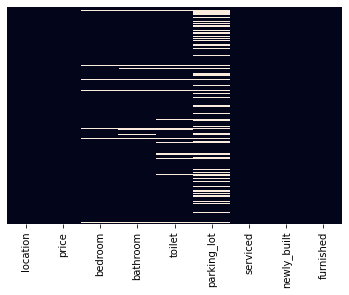

In [18]:
# check for number of missing values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False);

In [19]:
# check for number of missing values
data.isnull().sum()

location         0
price            0
bedroom         21
bathroom        36
toilet          87
parking_lot    456
serviced         0
newly_built      0
furnished        0
dtype: int64

In [20]:
# Replace missing values using mode and median for categorical and numerical features respectively
data['location'] = data['location'].fillna(data['location'].mode()[0]) 
data['bedroom'] = data['bedroom'].fillna(data['bedroom'].mode()[0])
data['bathroom'] = data['bathroom'].fillna(data['bathroom'].mode()[0])
data['toilet'] = data['toilet'].fillna(data['toilet'].mode()[0])
data['parking_lot'] = data['parking_lot'].fillna(data['parking_lot'].mode()[0])

In [21]:
# check for number of missing values
data.isnull().sum()

location       0
price          0
bedroom        0
bathroom       0
toilet         0
parking_lot    0
serviced       0
newly_built    0
furnished      0
dtype: int64

In [22]:
# converting the labels from strings to ints and also replacing the NAN
data.bedroom = data.bedroom.astype(int)

data.bathroom = data.bathroom.apply(lambda x: x.replace(' ','0'))
data.bathroom = data.bathroom.astype(int)

data.toilet = data.toilet.apply(lambda x: x.replace(' ','0'))
data.toilet = data.toilet.astype(int)

data.parking_lot = data.parking_lot.astype(int)

In [23]:
# rounding up price to one decimal place 
data.price = data.price / 1000000

In [24]:
data.head(3)

location  price  bedroom  bathroom  toilet  parking_lot  serviced  \
0     Ajah    1.2        2         3       3           12         0   
1     Ajah    1.0        2         2       0            2         0   
2     Ajah    1.0        2         2       3            2         0   

   newly_built  furnished  
0            0          0  
1            0          0  
2            0          0

In [17]:
# Data Description for integer-valued features.
data.describe()

price      bedroom     bathroom       toilet  parking_lot  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      5.322496     2.415753     2.427397     3.153425     3.240411   
std      31.947491     0.976993     1.058697     1.280323     3.872241   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       0.700000     2.000000     2.000000     2.000000     2.000000   
50%       1.800000     3.000000     3.000000     4.000000     2.000000   
75%       7.000000     3.000000     3.000000     4.000000     3.000000   
max    1200.000000    12.000000     6.000000    12.000000    50.000000   

          serviced  newly_built    furnished  
count  1460.000000  1460.000000  1460.000000  
mean      0.069863     0.080822     0.012329  
std       0.255003     0.272655     0.110386  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

In [18]:
# Data Description for categorical features
data.describe(include=['O']) 

location
count      1460
unique       39
top       Lekki
freq        346

In [25]:
# Checking for the highest number of bedrooms
data.nlargest(5, 'bedroom')

location  price  bedroom  bathroom  toilet  parking_lot  \
1112               Shomolu  10.80       12         0      12           16   
1151                 Ikeja   1.40        6         2       2            2   
278   Victoria Island (VI)   0.12        5         5       6            3   
719                  Lekki   5.00        5         5       6            8   
753                  Ikeja   5.00        5         5       5            8   

      serviced  newly_built  furnished  
1112         0            0          0  
1151         0            0          0  
278          0            0          0  
719          0            0          0  
753          0            0          0

In [26]:
# Checking for the highest number of prices
data.nlargest(5, 'price')

location   price  bedroom  bathroom  toilet  parking_lot  \
756                  Ikeja  1200.0        2         3       3            6   
318   Victoria Island (VI)   130.0        3         3       4            2   
1441               Gbagada    40.0        3         3       3            2   
1013     Eko Atlantic City    35.0        3         3       4            2   
430                  Ikoyi    32.0        4         4       6            4   

      serviced  newly_built  furnished  
756          0            0          0  
318          0            0          0  
1441         0            0          0  
1013         0            0          0  
430          0            0          0

In [27]:
corr = data.corr()
corr

price   bedroom  bathroom    toilet  parking_lot  serviced  \
price        1.000000  0.073753  0.088183  0.077009     0.002672 -0.007444   
bedroom      0.073753  1.000000  0.787601  0.791704     0.038784  0.012636   
bathroom     0.088183  0.787601  1.000000  0.660517     0.057845  0.026417   
toilet       0.077009  0.791704  0.660517  1.000000     0.043984  0.025928   
parking_lot  0.002672  0.038784  0.057845  0.043984     1.000000 -0.046174   
serviced    -0.007444  0.012636  0.026417  0.025928    -0.046174  1.000000   
newly_built -0.037163 -0.149386 -0.098380 -0.092485     0.060784 -0.031977   
furnished    0.006723  0.022348  0.031124  0.035103    -0.013353  0.164173   

             newly_built  furnished  
price          -0.037163   0.006723  
bedroom        -0.149386   0.022348  
bathroom       -0.098380   0.031124  
toilet         -0.092485   0.035103  
parking_lot     0.060784  -0.013353  
serviced       -0.031977   0.164173  
newly_built     1.000000  -0.010357  
furnished      -0.010357   1.000000

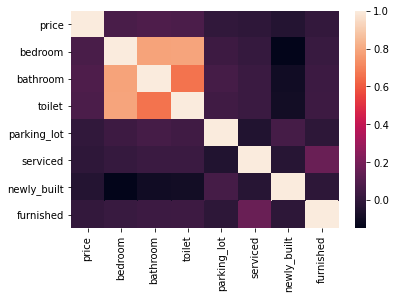

In [28]:
# heat map
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

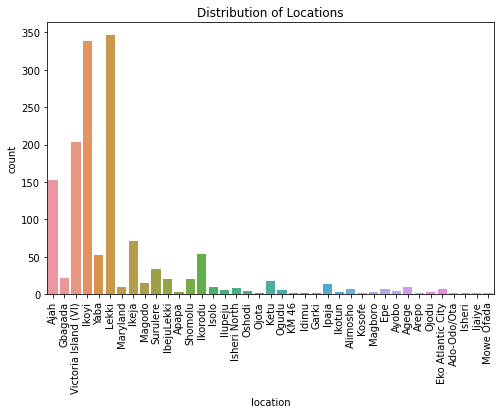

In [48]:
# location with the highest numbers of renst available
fig = plt.figure(figsize=(8, 5))
sns.countplot(data.location);
plt.title("Distribution of Locations")
plt.xticks(rotation=90);

In [22]:
# Categorical variable 
data.location.value_counts()

Lekki                   346
Ikoyi                   338
Victoria Island (VI)    204
Ajah                    152
Ikeja                    71
Ikorodu                  54
Yaba                     52
Surulere                 34
Gbagada                  22
Shomolu                  20
IbejuLekki               20
Ketu                     17
Magodo                   15
Ipaja                    14
Maryland                 10
Isolo                    10
Agege                     9
Isheri North              8
Alimosho                  7
Epe                       7
Eko Atlantic City         7
Ogudu                     6
Ilupeju                   5
Oshodi                    4
Ayobo                     4
Apapa                     3
Magboro                   3
Ikotun                    3
Ojodu                     3
Ado-Odo/Ota               2
Ojota                     2
Kosofe                    1
Idimu                     1
Mowe Ofada                1
KM 46                     1
Isheri              

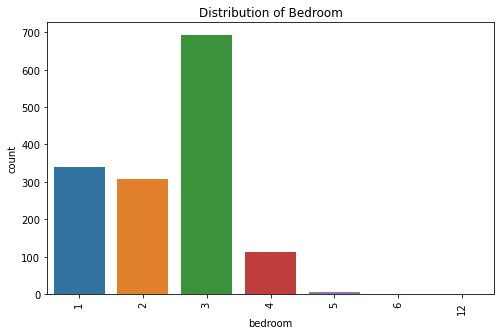

In [49]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(data.bedroom);
plt.title("Distribution of Bedroom")
plt.xticks(rotation=90);

In [24]:
# Categorical variable 
data.bathroom.value_counts()

3    636
2    317
1    277
4    167
0     52
5      9
6      2
Name: bathroom, dtype: int64

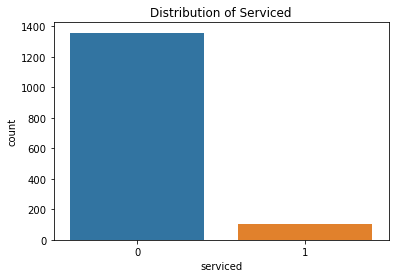

In [51]:
sns.countplot(data.serviced);
plt.title("Distribution of Serviced");

In [26]:
data.serviced.value_counts()

0    1358
1     102
Name: serviced, dtype: int64

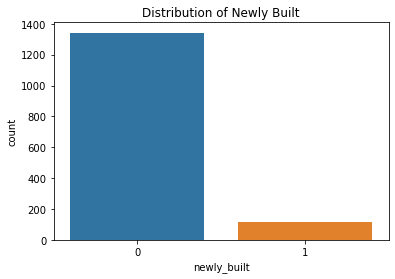

In [52]:
sns.countplot(data.newly_built);
plt.title("Distribution of Newly Built");

In [28]:
data.newly_built.value_counts()

0    1342
1     118
Name: newly_built, dtype: int64

Text(0.5, 1.0, 'Distribution of Furnitured')

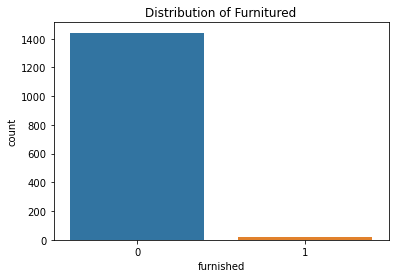

In [53]:
sns.countplot(data.furnished);
plt.title("Distribution of Furnitured")

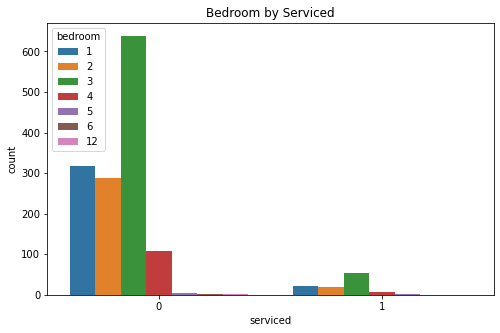

In [29]:
# checking bedrooms by serviced variables
plt.figure(figsize = (8, 5))
sns.countplot('serviced', hue = 'bedroom', data = data).set_title("Bedroom by Serviced");

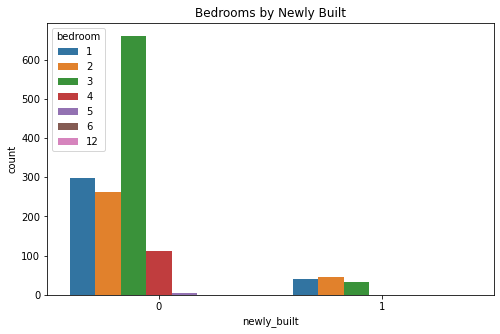

In [32]:
# checking bedrooms by newly built variables
plt.figure(figsize = (8, 5))
sns.countplot('newly_built', hue = 'bedroom', data = data).set_title("Bedrooms by Newly Built");

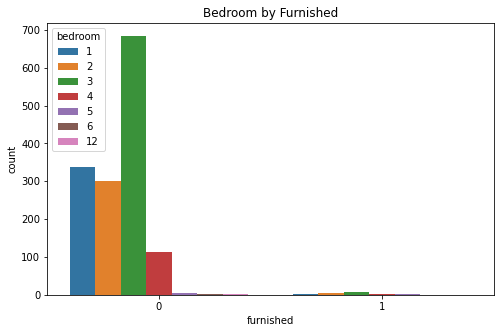

In [33]:
# checking bedrooms by furnished variables
plt.figure(figsize = (8, 5))
sns.countplot('furnished', hue = 'bedroom', data = data).set_title("Bedroom by Furnished");

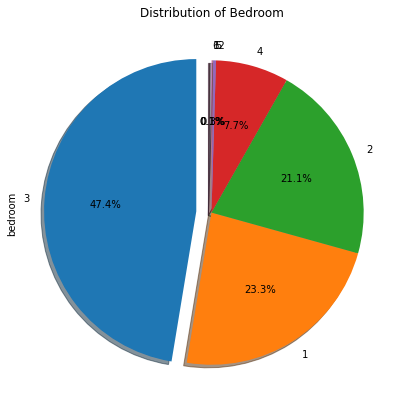

In [34]:
# create a pie chart of the 'bedroom' variable
explode = (0.1, 0, 0, 0, 0, 0, 0) # only "explode" the 3rd slice
plt.figure(figsize = (10, 7))
data.bedroom.value_counts().plot(kind = 'pie', explode=explode, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Bedroom')
plt.show()

In [35]:
# create a pivot table to find the average price per location
data.pivot_table(values='price', columns='location', aggfunc='mean')

location  Ado-Odo/Ota     Agege      Ajah  Alimosho     Apapa  Arepo   Ayobo  \
price           0.275  0.605556  1.045658  0.391429  2.666667    0.5  0.3125   

location  Eko Atlantic City       Epe  Garki  ...  Maryland  Mowe Ofada  \
price              5.050714  0.202857    0.6  ...      1.01         0.3   

location     Ogudu  Ojodu   Ojota  Oshodi  Shomolu  Surulere  \
price     1.366667   0.85  0.1265  0.7375    1.185       1.2   

location  Victoria Island (VI)      Yaba  
price                 7.217927  1.074038  

[1 rows x 39 columns]

In [36]:
# get the average price per location for each bedroom and save to a dataframe
bedrooms = pd.pivot_table(data, index=['bedroom', 'location'], aggfunc={'price' : 'mean'})
bedrooms = bedrooms.reset_index()

# split the dataframe into seven smaller dataframes based on branch
bedrooms_1 = bedrooms.loc[bedrooms['bedroom'] == 1]
bedrooms_2 = bedrooms.loc[bedrooms['bedroom'] == 2]
bedrooms_3 = bedrooms.loc[bedrooms['bedroom'] == 3]
bedrooms_4 = bedrooms.loc[bedrooms['bedroom'] == 4]
bedrooms_5 = bedrooms.loc[bedrooms['bedroom'] == 5]
bedrooms_6 = bedrooms.loc[bedrooms['bedroom'] == 6]
bedrooms_12 = bedrooms.loc[bedrooms['bedroom'] == 12]

In [37]:
# average price of one bedroom per location
bedrooms_1

bedroom              location     price
0         1                  Ajah  0.531163
1         1              Alimosho  0.230000
2         1                   Epe  0.160000
3         1                 Garki  0.600000
4         1               Gbagada  0.364000
5         1            IbejuLekki  0.457143
6         1                 Idimu  0.300000
7         1                 Ikeja  0.810000
8         1               Ikorodu  0.146819
9         1                Ikotun  0.250000
10        1                 Ikoyi  4.066667
11        1               Ilupeju  0.310000
12        1                 Ipaja  0.172857
13        1                  Ketu  0.525000
14        1                Kosofe  0.350000
15        1                 Lekki  1.056934
16        1              Maryland  0.608333
17        1                 Ogudu  0.800000
18        1                 Ojodu  0.350000
19        1                 Ojota  0.126500
20        1               Shomolu  0.395000
21        1              Surulere  0.555000
22        1  Victoria Island (VI)  1.512800
23        1                  Yaba  0.586957

In [38]:
# average price of two bedroom per location
bedrooms_2

bedroom              location      price
24        2           Ado-Odo/Ota   0.300000
25        2                 Agege   0.516667
26        2                  Ajah   0.962500
27        2              Alimosho   0.416667
28        2                 Ayobo   0.350000
29        2     Eko Atlantic City   0.060000
30        2                   Epe   0.310000
31        2               Gbagada   1.112500
32        2            IbejuLekki   0.618750
33        2                 Ikeja  87.007143
34        2               Ikorodu   0.284118
35        2                Ikotun   0.300000
36        2                 Ikoyi   9.938438
37        2                 Ipaja   0.400000
38        2          Isheri North   0.825000
39        2                 Isolo   0.737500
40        2                  Ketu   0.620000
41        2                 Lekki   1.979661
42        2                Magodo   1.466667
43        2              Maryland   0.850000
44        2                 Ogudu   1.000000
45        2                Oshodi   0.750000
46        2               Shomolu   0.875000
47        2              Surulere   1.456250
48        2  Victoria Island (VI)   4.800703
49        2                  Yaba   1.226923

In [39]:
# average price of three bedroom per location
bedrooms_3

bedroom              location      price
50        3           Ado-Odo/Ota   0.250000
51        3                 Agege   0.650000
52        3                  Ajah   1.550000
53        3              Alimosho   0.800000
54        3                 Apapa   2.666667
55        3                 Arepo   0.500000
56        3                 Ayobo   0.275000
57        3     Eko Atlantic City   7.059000
58        3               Gbagada   5.733333
59        3            IbejuLekki   0.675000
60        3                Ijaiye   0.350000
61        3                 Ikeja   3.163158
62        3               Ikorodu   0.363333
63        3                 Ikoyi  10.537623
64        3               Ilupeju   1.800000
65        3                 Ipaja   0.575000
66        3                Isheri   1.400000
67        3          Isheri North   0.916667
68        3                 Isolo   1.075000
69        3                 KM 46   0.600000
70        3                  Ketu   0.742857
71        3                 Lekki   2.677000
72        3               Magboro   0.450000
73        3                Magodo   1.766667
74        3              Maryland   1.866667
75        3            Mowe Ofada   0.300000
76        3                 Ogudu   1.800000
77        3                 Ojodu   1.100000
78        3                Oshodi   0.733333
79        3               Shomolu   1.028571
80        3              Surulere   1.521429
81        3  Victoria Island (VI)   8.317567
82        3                  Yaba   1.650000

In [40]:
# average price of four bedroom per location
bedrooms_4

bedroom              location      price
83        4                  Ajah   2.750000
84        4     Eko Atlantic City   0.000000
85        4               Ikorodu   0.300000
86        4                 Ikoyi  13.787000
87        4                  Ketu   0.650000
88        4                 Lekki   3.825000
89        4              Surulere   1.150000
90        4  Victoria Island (VI)  10.327136

In [41]:
# average price of five bedroom per location
bedrooms_5

bedroom              location  price
91        5            IbejuLekki  2.500
92        5                 Ikeja  5.000
93        5                 Lekki  5.000
94        5  Victoria Island (VI)  0.125

In [42]:
# average price of six bedroom per location
bedrooms_6

bedroom location  price
95        6    Ikeja    1.4

In [43]:
# average price of twelve bedroom per location
bedrooms_12

bedroom location  price
96       12  Shomolu   10.8

In [45]:
fig.savefig('my_figure.png')

NameError: name 'fig' is not defined

In [44]:
import pprint # pretty printer
pprint.pprint(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}


In [46]:
from wordcloud import WordCloud, STOPWORDS

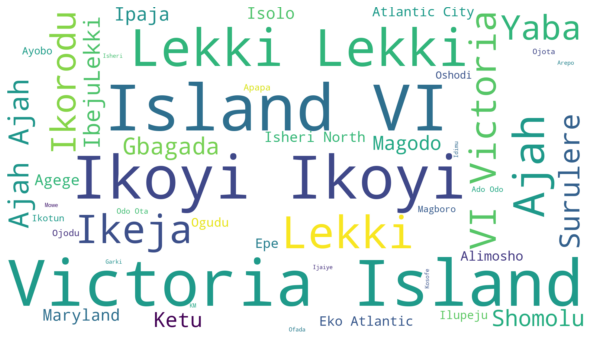

In [47]:
plt.subplots(figsize=(15,6))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(data['location']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cast.png')
plt.show()

In [47]:
data.to_csv('training_test_data.csv', index=False)